In [3]:
# plot_dr_and_sav_piechart.ipynb
"""""""""""""""""""""""""""""""""
# Author: Keila Velazquez-Arcelay
# 
# Description: Create piechart where the total of values is the number of circadian genes,
#              and the slices represent the number of PrediXcan divergently regulated genes
#              and the number of archaic-specific splice-altering variants.
#
"""""""""""""""""""""""""""""""""


# INPUT DATA
CIRCADIAN_FILE = '../data/circadian_genes.list'
DR_FILE = '../data/circadian_genes_predixcan_dr.tsv'
SAV_FILE = '../data/circadian_variants_sav.tsv'


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [4]:
# LOAD DATA
circadian_genes = pd.read_csv(CIRCADIAN_FILE, sep='\t')
dr_genes = pd.read_csv(DR_FILE, sep='\t')
dr_genes = dr_genes[dr_genes.iloc[:,3:].sum(axis=1)==3][['GeneID','GeneName']].drop_duplicates()
sav_genes = pd.read_csv(SAV_FILE, sep='\t')[['GeneID','GeneName']].drop_duplicates()

labels = ['CIRCADIAN', 'DR', 'SAV']
data = [len(circadian_genes)-len(dr_genes)-len(sav_genes), len(dr_genes), len(sav_genes)]


In [5]:
# CREATE AUTOPCT ARGUMENTS
def func(pct, allvalues):
    absolute = int((pct / 100)*sum(allvalues))
    return "{:.1f}%\n({:.0f})".format(pct, absolute)


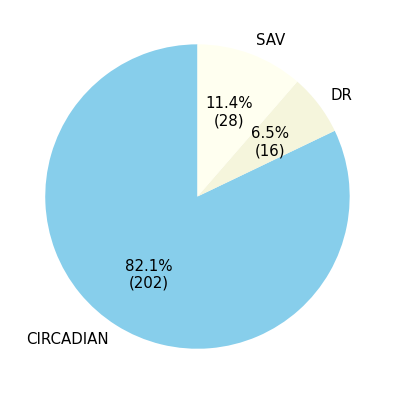

In [6]:
# CREATE PIE PLOT
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: "{:.1f}%\n({:.0f})".format(pct, (pct * sum(data) / 100)),
                                  labels = labels,
                                  shadow = False,
                                  startangle = 90,
                                  colors = ['skyblue', 'beige', 'ivory'],
                                  textprops={'fontsize': 15}
                                  #textprops = dict(color ="magenta")
                                 )

#plt.savefig('plots/predixcan_dr_sav_piechart.pdf', dpi=500, bbox_inches='tight')
plt.show()
